# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



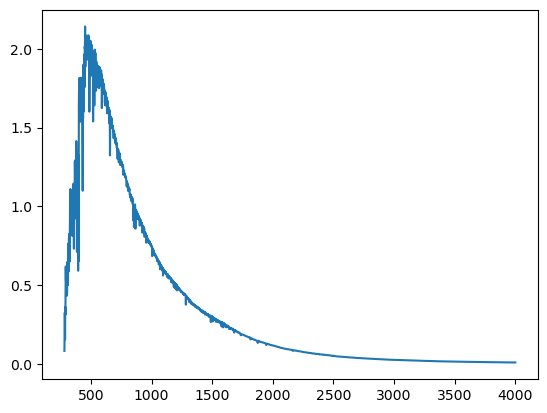

In [3]:
import requests
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5488\3166345797.py:12: RuntimeWarning: overflow encountered in exp
  return 8*np.pi*h*c*lam**-5 / (np.exp(h*c/(lam*kB*T)) - 1)


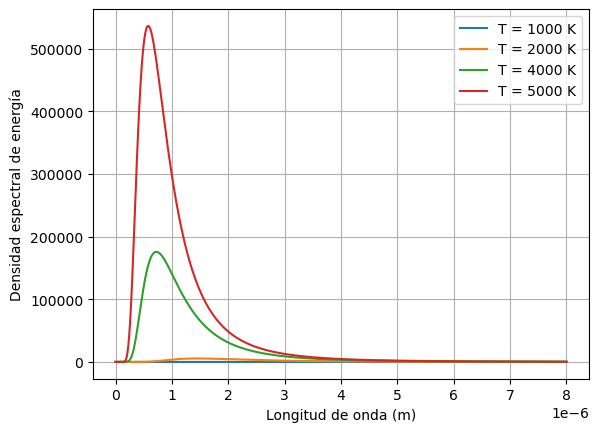

Para T = 1000 K, lambda_max = 2.8995365365365364 µm
Para T = 2000 K, lambda_max = 1.4502682682682682 µm
Para T = 4000 K, lambda_max = 0.7216306306306306 µm
Para T = 5000 K, lambda_max = 0.5775045045045044 µm


In [4]:
#Item 2

from scipy.integrate import quad

h = 6.62607015e-34
c = 299792458
kB = 1.380649e-23
sigma = 5.67e-8

# Función de densidad espectral de energía
def u(lam, T):
    return 8*np.pi*h*c*lam**-5 / (np.exp(h*c/(lam*kB*T)) - 1)

# Temperaturas
T_values = np.array([1000, 2000, 4000, 5000])

# Longitudes de onda entre 1nm y 8µm
lam_values = np.linspace(1e-9, 8e-6, 1000)

# Plot de la Funcion de densidad vs longitud de onda
plt.figure()
for T in T_values:
    plt.plot(lam_values, u(lam_values, T), label=f'T = {T} K')

plt.xlabel('Longitud de onda (m)')
plt.ylabel('Densidad espectral de energía')
plt.legend()
plt.grid()
plt.show()

# Longitud de onda para el máximo de cada curva
for T in T_values:
    idx_max = np.argmax(u(lam_values, T))
    lambda_max_T = lam_values[idx_max]
    print(f'Para T = {T} K, lambda_max = {lambda_max_T*1e6} µm')


El valor de la integral es aproximadamente: 6.49393940226683
El valor esperado es:  6.493939402266828


C:\Users\DELL\AppData\Local\Temp\ipykernel_5488\4199901132.py:5: RuntimeWarning: overflow encountered in exp
  return x**3/(np.exp(x) - 1)


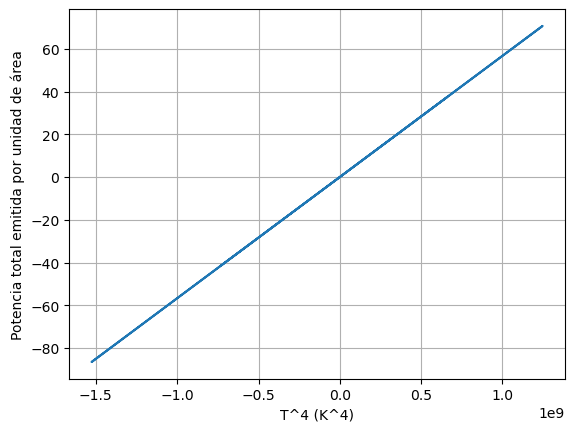

In [5]:
#Item 3

# Integral para calcular la potencia total emitida por unidad de área
def integrand(x):
    return x**3/(np.exp(x) - 1)

# Realizar la integral numérica
result, error = quad(integrand, 0, np.inf)
print(f'El valor de la integral es aproximadamente: {result}')

b= (np.pi)**4 /15

print("El valor esperado es: ",b)


# Construir la curva de Pt vs T^4
T4_values = T_values**4
P_total_values = sigma*T4_values
plt.figure()
plt.plot(T4_values, P_total_values)
plt.xlabel('T^4 (K^4)')
plt.ylabel('Potencia total emitida por unidad de área')
plt.grid()
plt.show()

Los resultados son acordes a lo esperado ya que según el modelo la potencia total y T^4 son directamente proporcionales,con factor de proporcionalidad 𝜎; donde 𝜎 es la constante de Stefan-Boltzmann.

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






In [1]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.09
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.21
4  1884        -0.29       -0.24


In [2]:
data

,Año,NoSauvizado,Promedio_5
0,1880,-0.17,-0.09
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.21
4,1884,-0.29,-0.24
...,...,...,...
139,2019,0.98,0.94
140,2020,1.02,0.95
141,2021,0.85,0.98
142,2022,0.90,1.00


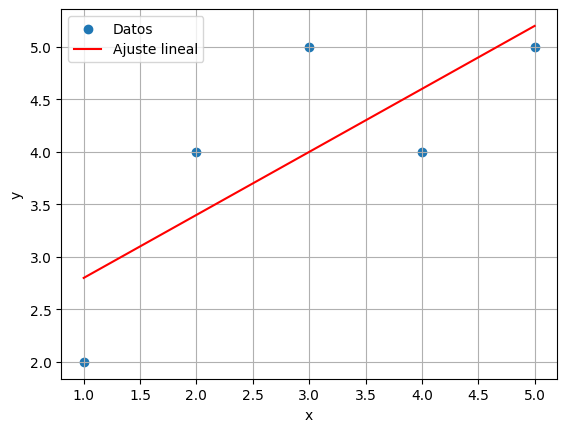

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

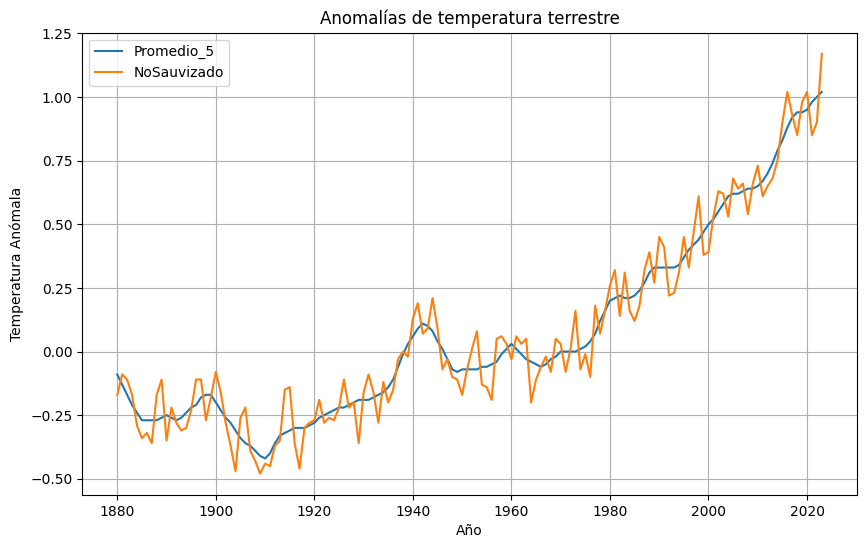

In [4]:
#Items 1y2)


url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]

plt.figure(figsize=(10, 6))
plt.plot(data['Año'], data['Promedio_5'], label='Promedio_5')
plt.plot(data['Año'], data['NoSauvizado'], label='NoSauvizado')
plt.xlabel('Año')
plt.ylabel('Temperatura Anómala')
plt.legend()
plt.title('Anomalías de temperatura terrestre')
plt.grid()
plt.show()

#item 3, análisis:

Si bien en la gráfica anterior hay obvias diferencias entre la gráfica suavizada y la del promedio_5, pues en la segunda las fluctuaciones entre los valores cercanos es mucho mayor que en la primera, sí es evidente que el aumento de temperatura ha tenido un crecimiento sin precedentes en los últimos 40-50 años, en comparación a los 100 años anteriores. Lastimosamente la tendencia no indica que no vaya a seguir subiendo.

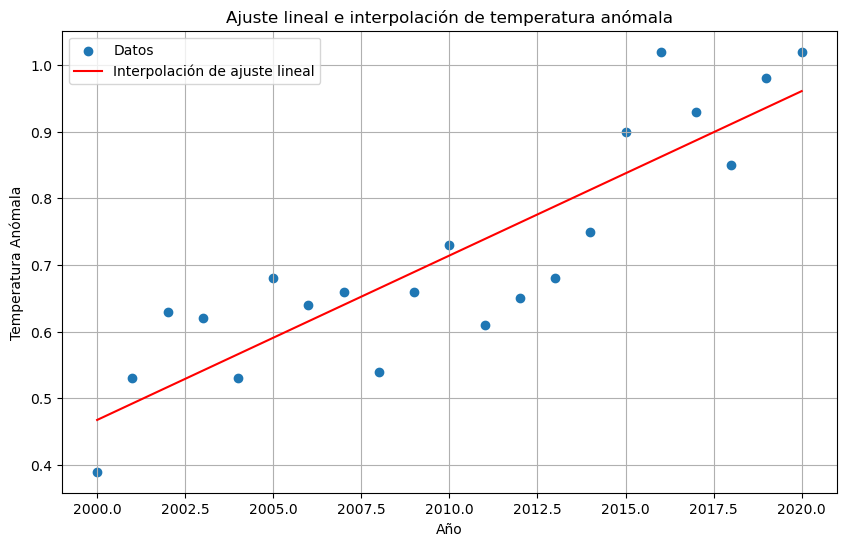

In [15]:
#Items 4 y 5


data_subset = data[(data['Año'] >= 2000) & (data['Año'] <= 2020)]

x_subset = data_subset['Año']
y_subset = data_subset['NoSauvizado']

# Ajuste lineal
params, covariance = curve_fit(linear_func, x_subset, y_subset)
m, b = params

# Interpolación
x_interp = np.linspace(2000, 2020, 100)
y_interp = linear_func(x_interp, m, b)

plt.figure(figsize=(10, 6))
plt.scatter(x_subset, y_subset, label='Datos')
plt.plot(x_interp, y_interp, label='Interpolación de ajuste lineal', color='red')
plt.xlabel('Año')
plt.ylabel('Temperatura Anómala')
plt.legend()
plt.title('Ajuste lineal e interpolación de temperatura anómala')
plt.grid()
plt.show()

#Items 6 y 7.

6) 
Dado que el conjunto de datos que estamos analizando es "grande" en comparación a la fluctuación entre estos, es conveniente usar el modelo de interpolación pues este predice con mucha exactitud la tendencia que tienen los datos a lo largo del tiempo (en este caso los datos dan cuenta del aumento de temperatura con los años).

7)
Ser podría estudiar el comportamiento de la temperatura en distintas escalas de tiempo (cada 5 años, cada 10 años, cada 15años, etc.) y buscar alguna posible correlación sobre como cambia la pendiente de la grafica correspondiente, para poder hacer una posible hipótesis de como cambiará durante los proximos años, finalmente con los "valores candidatos" del proceso anterior, hacer una interpolación.